In [1]:
import pandas as pd

from pathlib import Path
from os import chdir

chdir("/Users/shahrez/Documents/Developer/projects/mclaren_applied")

In [2]:
# Load the data from CSV files
club_data = pd.read_csv(Path.cwd() / 'data/club_data.csv')
planet_data = pd.read_csv(Path.cwd() / 'data/planet_data.csv')
training_data = pd.read_csv(Path.cwd() / 'data/training_data.csv')
test_data = pd.read_csv(Path.cwd() / 'data/test_data.csv')


In [3]:
import math

club_data['initial_ball_speed (m/s)'] = 1.5 * club_data['swing_speed (m/s)']
data = training_data.merge(planet_data, on='planet').merge(club_data, on='club')
t_data = test_data.merge(planet_data, on='planet').merge(club_data, on='club')
# Calculate initial ball speed

def projectile_distance(v, g, deg):
    angle_radians = math.radians(deg)
    return (v**2/g)*math.sin(2*angle_radians)

data['loft_angle (rad)'] = data.apply(lambda row: math.radians(row['loft_angle (deg)']), axis=1)
t_data['loft_angle (rad)'] = t_data.apply(lambda row: math.radians(row['loft_angle (deg)']), axis=1)


# X = merged_data.drop(columns=['club', 'planet_data'])
# y = merged_data['club']  

data.head()


,planet,club,shot_distance (m),gravity (m/s^2),air_density (kg/m^3),swing_speed (m/s),loft_angle (deg),initial_ball_speed (m/s),loft_angle (rad)
0,Polis Massa,driver,229.7712,5.49,1.55,50,8,75.0,0.139626
1,Trandosha,driver,255.4600,6.08,1.25,50,8,75.0,0.139626
2,Felucia,driver,230.6538,7.36,1.30,50,8,75.0,0.139626
3,Geonosis,driver,218.1139,8.83,1.22,50,8,75.0,0.139626
4,Tatooine,driver,178.3659,9.81,1.64,50,8,75.0,0.139626


In [4]:
import math
def calculate_initial_velocity(swing_speed, loft_angle_deg):
    """
    Calculate the initial velocity of a golf ball based on initial ball speed (m/s) and loft angle (degrees).

    Args:
    - initial_ball_speed (float): Initial ball speed in meters per second (m/s).
    - loft_angle_deg (float): Loft angle in degrees.

    Returns:
    - initial_velocity (float): Initial velocity of the golf ball in meters per second (m/s).
    """
    # Convert loft angle from degrees to radians
    loft_angle_rad = math.radians(loft_angle_deg)
    
    # Calculate initial velocity using the provided equation
    initial_velocity = 1.5 * swing_speed * (1 + math.sin(loft_angle_rad))
    
    return initial_velocity

data['initial_velocity'] = data.apply(lambda row: calculate_initial_velocity(row['swing_speed (m/s)'], row['loft_angle (deg)']), axis=1)
t_data['initial_velocity'] = t_data.apply(lambda row: calculate_initial_velocity(row['swing_speed (m/s)'], row['loft_angle (deg)']), axis=1)

# Display the updated merged data
t_data

,planet,club,shot_distance (m),gravity (m/s^2),air_density (kg/m^3),swing_speed (m/s),loft_angle (deg),initial_ball_speed (m/s),loft_angle (rad),initial_velocity
0,Endor,driver,226.5390,8.34,1.20,50,8,75.0,0.139626,85.437983
1,Haruun Kal,driver,203.7920,9.61,1.28,50,8,75.0,0.139626,85.437983
2,Bespin,driver,151.4992,14.72,1.37,50,8,75.0,0.139626,85.437983
3,Endor,3 wood,223.2954,8.34,1.20,48,12,72.0,0.209440,86.969642
4,Haruun Kal,3 wood,201.4677,9.61,1.28,48,12,72.0,0.209440,86.969642
5,Bespin,3 wood,152.7555,14.72,1.37,48,12,72.0,0.209440,86.969642
6,Endor,5 wood,217.5753,8.34,1.20,46,20,69.0,0.349066,92.599390
7,Haruun Kal,5 wood,197.3655,9.61,1.28,46,20,69.0,0.349066,92.599390
8,Bespin,5 wood,154.3749,14.72,1.37,46,20,69.0,0.349066,92.599390
9,Endor,3 iron,209.2289,8.34,1.20,44,21,66.0,0.366519,89.652285


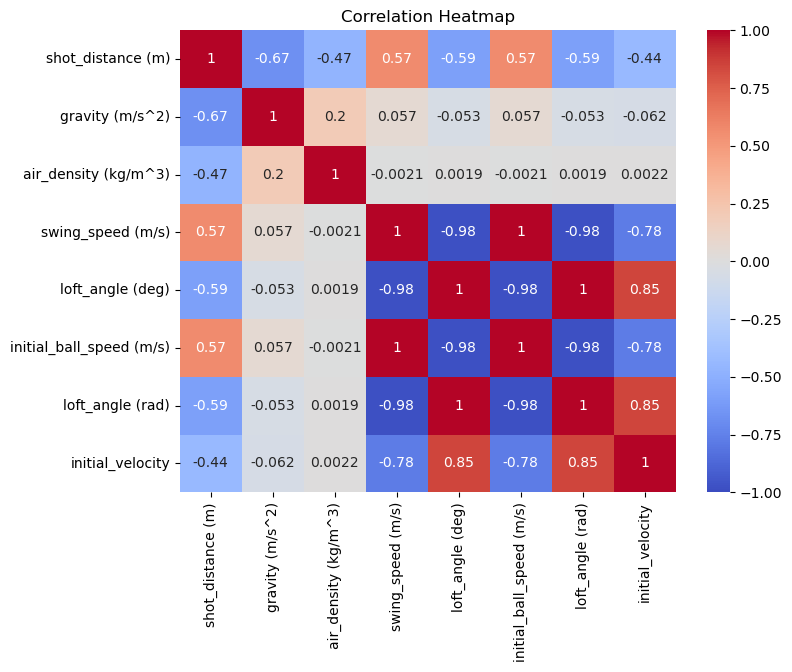

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = data[2:].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

0 0.7506629899199831 240.29028337333335


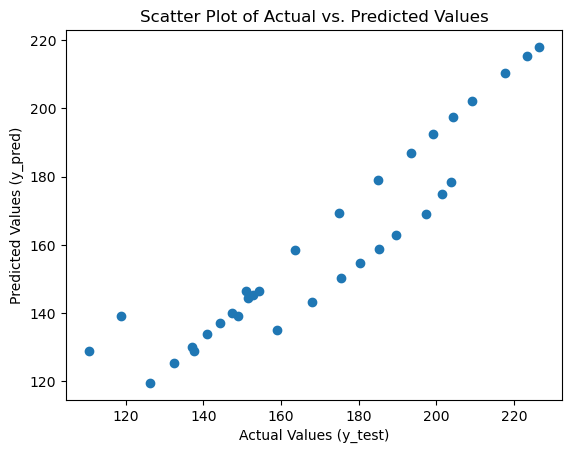

Endor


/Users/shahrez/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- initial_ball_speed (m/s)
- loft_angle (rad)
Feature names seen at fit time, yet now missing:
- initial_velocity

  warnings.warn(message, FutureWarning)


ValueError: X has 4 features, but DecisionTreeRegressor is expecting 3 features as input.

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error, accuracy_score
# X_test = t_data[['initial_ball_speed (m/s)', 'gravity (m/s^2)', 'air_density (kg/m^3)', 'loft_angle (rad)']]
# X_train = data[['initial_ball_speed (m/s)','gravity (m/s^2)', 'air_density (kg/m^3)', 'loft_angle (rad)']]
X_test = t_data[['initial_velocity', 'gravity (m/s^2)', 'air_density (kg/m^3)']]
X_train = data[['initial_velocity','gravity (m/s^2)', 'air_density (kg/m^3)']]



y_test = t_data['shot_distance (m)']
y_train = data['shot_distance (m)']
# Fit a linear regression model
best_score=-1
best_random_state=None
for random_state in range(100):
    dtr_model = DecisionTreeRegressor(random_state=random_state)
    dtr_model.fit(X_train, y_train)
    dtr_y_pred = dtr_model.predict(X_test)
    r2 = r2_score(y_test, dtr_y_pred)
    mse = mean_squared_error(y_test, dtr_y_pred)
    
    if r2 > best_score:
        best_score = r2
        best_random_state = random_state


print(best_random_state, r2, mse)
# print(X_test.head())
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(y_test, dtr_y_pred)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.show()
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy * 100:.2f}%")

for index, row in t_data.iterrows():
    planet_name = row['planet']
    planet_gravity = row['gravity (m/s^2)']
    planet_air_density = row['air_density (kg/m^3)']
    actual_distance = row['shot_distance (m)']
    actual_club = row['club']
    print(planet_name)

    for index, row in club_data.iterrows():
        club_name = row['club']
        club_speed = row['swing_speed (m/s)'] * 1.5
        club_angle = math.radians(row['loft_angle (deg)'])
        
        df = pd.DataFrame({'initial_ball_speed (m/s)':[club_speed],	'gravity (m/s^2)':[planet_gravity],	'air_density (kg/m^3)':[planet_air_density], 'loft_angle (rad)':[club_angle]})
        distance = dtr_model.predict(df)
        print(planet_name, actual_club, club_name, actual_distance, distance[0])


0.9043855321977358 92.14527580732343


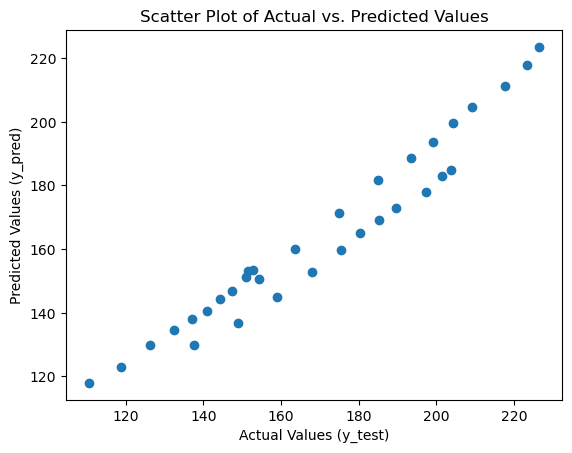

Endor
Endor driver driver 2.949694999999906
Endor driver 3 wood 8.547839999999837
Endor driver 5 wood 15.151528999999698
Endor driver 3 iron 21.870391999999896
Endor driver 4 iron 27.04173199999994
Endor driver 5 iron 32.99514800000023
Endor driver 6 iron 37.86842300000001
Endor driver 7 iron 44.67651000000009
Endor driver 8 iron 55.259850000000085
Endor driver 9 iron 66.49734700000019
Endor driver pw 75.45893099999995
Haruun Kal
Haruun Kal driver driver 18.808549999999883
Haruun Kal driver 3 wood 20.677633000000128
Haruun Kal driver 5 wood 25.72679700000012
Haruun Kal driver 3 iron 30.900623000000195
Haruun Kal driver 4 iron 34.80302799999998
Haruun Kal driver 5 iron 38.80037100000001
Haruun Kal driver 6 iron 44.060012999999856
Haruun Kal driver 7 iron 51.03282999999996
Haruun Kal driver 8 iron 58.912794000000076
Haruun Kal driver 9 iron 67.01236399999988
Haruun Kal driver pw 73.94025699999997
Bespin
Bespin driver driver -1.749647999999894
Bespin driver 3 wood -1.8913239999999973
Besp

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)


r2 = r2_score(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)


print(r2, mse)
# print(X_test.head())
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.show()

    
for index, row in t_data.iterrows():
    planet_name = row['planet']
    planet_gravity = row['gravity (m/s^2)']
    planet_air_density = row['air_density (kg/m^3)']
    actual_distance = row['shot_distance (m)']
    actual_club = row['club']
    print(planet_name)

    for index, row in club_data.iterrows():
        club_name = row['club']
        club_speed = row['swing_speed (m/s)'] * 1.5
        club_angle = math.radians(row['loft_angle (deg)'])
        
        df = pd.DataFrame({'initial_ball_speed (m/s)':[club_speed],	'gravity (m/s^2)':[planet_gravity],	'air_density (kg/m^3)':[planet_air_density], 'loft_angle (rad)':[club_angle]})
        distance = rf_regressor.predict(df)
        print(planet_name, actual_club, club_name, actual_distance - distance[0])

0.9449871769335764 53.01678575336949


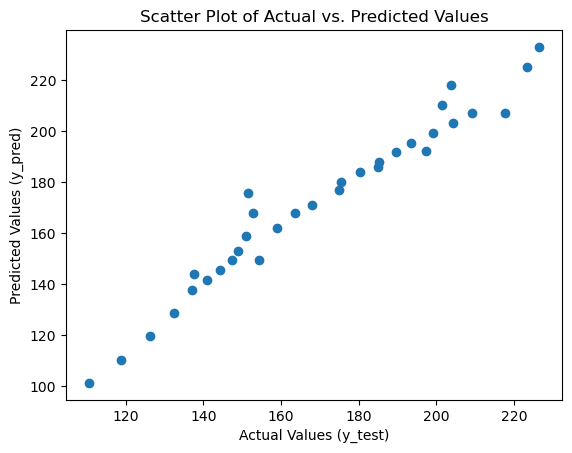

Endor
Endor driver driver -6.6773523290891035
Endor driver 3 wood 1.1785532915686758
Endor driver 5 wood 19.39736392758266
Endor driver 3 iron 19.481090786723257
Endor driver 4 iron 23.409043597052175
Endor driver 5 iron 27.336996407381093
Endor driver 6 iron 31.264949217709955
Endor driver 7 iron 40.37435453571692
Endor driver 8 iron 49.48375985372388
Endor driver 9 iron 58.5931651717309
Endor driver pw 67.70257048973787
Haruun Kal
Haruun Kal driver driver -14.428440868209549
Haruun Kal driver 3 wood -6.5725352475517695
Haruun Kal driver 5 wood 11.646275388462158
Haruun Kal driver 3 iron 11.730002247602869
Haruun Kal driver 4 iron 15.65795505793173
Haruun Kal driver 5 iron 19.58590786826059
Haruun Kal driver 6 iron 23.51386067858951
Haruun Kal driver 7 iron 32.62326599659647
Haruun Kal driver 8 iron 41.73267131460344
Haruun Kal driver 9 iron 50.8420766326104
Haruun Kal driver pw 59.95148195061742
Bespin
Bespin driver driver -24.219530350081044
Bespin driver 3 wood -16.363624729423265


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X_test = t_data[['initial_ball_speed (m/s)', 'gravity (m/s^2)', 'air_density (kg/m^3)', 'loft_angle (rad)']]
y_test = t_data['shot_distance (m)']

X_train = data[['initial_ball_speed (m/s)','gravity (m/s^2)', 'air_density (kg/m^3)', 'loft_angle (rad)']]
y_train = data['shot_distance (m)']
# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(r2, mse)
# print(X_test.head())
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.show()


for index, row in t_data.iterrows():
    planet_name = row['planet']
    planet_gravity = row['gravity (m/s^2)']
    planet_air_density = row['air_density (kg/m^3)']
    actual_distance = row['shot_distance (m)']
    actual_club = row['club']
    print(planet_name)

    for index, row in club_data.iterrows():
        club_name = row['club']
        club_speed = row['swing_speed (m/s)'] * 1.5
        club_angle = math.radians(row['loft_angle (deg)'])
        
        df = pd.DataFrame({'initial_ball_speed (m/s)':[club_speed],	'gravity (m/s^2)':[planet_gravity],	'air_density (kg/m^3)':[planet_air_density], 'loft_angle (rad)':[club_angle]})
        distance = model.predict(df)
        print(planet_name, actual_club, club_name, actual_distance - distance[0])